This script demonstrates the k-means algorithm.

Name : So-Jeong An


# Import and declare variable

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import *
from collections import defaultdict
from math import sqrt

file_data   = "mnist_test.csv" #open file
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images
line_data = []
totaldata = []
total = []
datas = []
realLabel = []
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
energy = 0

# normalize the values of the input data to be [0, 1]

In [2]:
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

# InitialiseLbel function: Initiallize Data, Label (Totallabel: [[data], label])

In [3]:
def initialdata(data):
    for line in data:
        
        count = 0
        line_data   = line.split(',')
        label       = line_data[0]
        im_vectors   = np.asfarray(line_data[1:])
        im_vector   = normalize(im_vectors)

        list_label[count]       = label
        list_image[:, count]    = im_vector
        count += 1
        realLabel.append(label)
        datas.append(im_vectors) # append data
    return datas
        
def initialiseLabel(k, n, data):#designate random label
    for i in range(0, n):
        labels = randint(0, k-1)
        totaldata.append((datas[i],labels))
    #return totaldata

datas = initialdata(data)
initialiseLabel(10, 1000, datas)

# computeCentroid function: Make 10 Centroids point

In [4]:
centroids = []

def computeMean(datas): #compute mean of (label = i)
    dimensions = 784
    sumArray = []
    for j in range(dimensions):
        meanHab = 0
        for i in range(len(datas)):
            meanHab += datas[i][j]
        sumArray.append(meanHab/len(datas))
    return sumArray

def computeCentroid(k):
    for i in range(0, k):
        centroid = []
        for j in range(0, 1000):
            if(totaldata[j][1]==i):
                centroid.append(datas[j])
        centroids.append(computeMean(centroid))
    return (centroids)

# computeDistance function: $f(x)= \sqrt{(vector1-vector2)^2}$

In [5]:
def computeDistance(data,centroid): # centroid: compute centor point  
    distance = 0.0
    for distanceCount in range(0, 784):
        _sum = (data[distanceCount] - centroid[distanceCount]) ** 2
        distance = distance + _sum
    return np.sqrt(distance)

# assignLabel function: reassign label of short distance

In [6]:
distancearray = []

def assignLabel(n):
    distances = []
    totaldata = []
    for i in range(0, n):
        shortest = 10000
        shortest_label = 0
        for j in range(0, 10):
            distances = computeDistance(datas[i],centroids[j])
            distancearray.append(distances)
            if(distances < shortest): #Compute the shortest centroid
                shortest = distances
                shortest_label = j
        totaldata.append((datas[i], shortest_label))
    return (totaldata)

# Compute Energy function

In [7]:
def computeEnergy():
    energy = 0
    for i in range(0, len(distancearray)):
        energy += distancearray[i] ** 2

    return energy

# computeAccuracy function

In [8]:
def computeAccuracy() :
    accurpercentage = 0.0
    accurCount=0
    for i in range(0, 1000):
        if(int(totaldata[i][1]) == int(realLabel[i])):
            accurCount += 1
        
    accurpercentage=(accurCount/1000) * 100
    return (accurpercentage)

# Run K-means

In [9]:
countcluster = 1
old_assignments = 1
for i in range(0, 10):
    centroids = []
    distancearray = []
    centroids = computeCentroid(10)
    totaldata = assignLabel(1000)
    old_energy = energy
    energy = computeEnergy()
    percent = computeAccuracy()
    print(countcluster, " energy: ", energy, " ", countcluster, " accuracy: ", percent,"%\n")
    countcluster += 1

1  energy:  32799054309.082176   1  accuracy:  24.0 %

2  energy:  38011956622.00083   2  accuracy:  31.2 %

3  energy:  40497445741.961876   3  accuracy:  35.8 %

4  energy:  41372527649.78153   4  accuracy:  37.4 %

5  energy:  41588276057.879524   5  accuracy:  37.7 %

6  energy:  41784219864.94089   6  accuracy:  37.8 %

7  energy:  41899956853.84656   7  accuracy:  38.0 %

8  energy:  41907299709.5439   8  accuracy:  37.9 %

9  energy:  41893841811.56088   9  accuracy:  37.8 %

10  energy:  41854324419.651985   10  accuracy:  37.7 %



# Data visualize

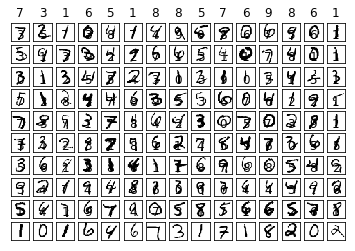

In [10]:
f1 = plt.figure(1)

for i in range(150):
    label       = totaldata[i][1]
    im_vector   = datas[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# plot the average image of all the images for each digit

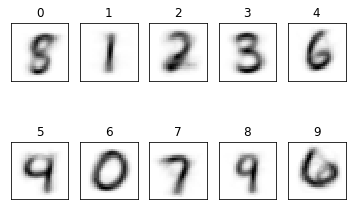

In [11]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(i)

    im_average[:, i] += centroids[i]
    plt.imshow(im_average[:, i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()